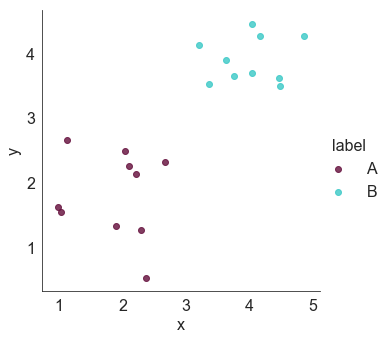

In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)

#number of points per group
n = 10

#define group labels and their centers
groups = {'A': (2,2),
          'B': (4,4)}

#create labeled x and y data
data = pd.DataFrame(index=range(n*len(groups)), columns=['x','y','label'])
for i, group in enumerate(groups.keys()):
    #randomly select n datapoints from a gaussian distrbution
    data.loc[i*n:((i+1)*n)-1,['x','y']] = np.random.normal(groups[group], 
                                                           [0.5,0.5], 
                                                           [n,2])
    #add group labels
    data.loc[i*n:((i+1)*n)-1,['label']] = group
#plot data with seaborn
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [72]:
len(data)

20

,x,y,label
0,1.109,1.26364,A
1,2.78522,2.77057,A


In [49]:
data.shape[0]
df=data
df.head()

,x,y,label
0,1.109,1.26364,A
1,2.78522,2.77057,A
2,1.40948,1.74879,A
3,1.44078,2.34063,A
4,1.81159,2.44522,A


In [60]:
print(df.loc[1]['label'])

A


In [111]:
print(df.at[0,'x'])


1.1090041361357015


In [115]:
for i in range(0, 3):    
    X_train(i) =df.iloc[i][0],df.iloc[i][1]
#     y_train[i] =df.iloc[i][2]
X_train

SyntaxError: can't assign to function call (<ipython-input-115-373e2d91faf7>, line 2)

In [92]:
print(df.iloc[0][1])

1.2636391389936057


Before you can get to the solution, it’s first a good idea to grasp the concept of loc and how it differs from other indexing attributes such as .iloc[] and .ix[]:

.loc[] works on labels of your index. This means that if you give in loc[2], you look for the values of your DataFrame that have an index labeled 2.
.iloc[] works on the positions in your index. This means that if you give in iloc[2], you look for the values of your DataFrame that are at index ’2`.
.ix[] is a more complex case: when the index is integer-based, you pass a label to .ix[]. ix[2] then means that you’re looking in your DataFrame for values that have an index labeled 2. This is just like .loc[]! However, if your index is not solely integer-based, ix will work with positions, just like .iloc[].

In [67]:
# # print(df.loc[2])
# # Pass `2` to `loc`
# print(df.loc[2])

# # Pass `2` to `iloc`
# print(df.iloc[2])

# # Pass `2` to `ix`
# print(df.ix[2])

x        1.40948
y        1.74879
label          A
Name: 2, dtype: object
x        1.40948
y        1.74879
label          A
Name: 2, dtype: object
x        1.40948
y        1.74879
label          A
Name: 2, dtype: object


C:\Users\xx17923\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [69]:
df[df["x"]>2]

,x,y,label
1,2.78522,2.77057,A
6,3.04014,1.25282,A
10,2.16041,1.35632,A
12,2.46694,1.32108,A
13,2.40261,1.77627,A
14,2.62859,2.27763,A
15,2.04736,2.14525,A
16,2.13707,1.45982,A
17,2.58793,1.63607,A
19,2.5361,2.02087,A


In [73]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import timeit

In [74]:
print(df.loc[2])

x        1.40948
y        1.74879
label          A
Name: 2, dtype: object


In [75]:
df.at(2)

ValueError: No axis named 2 for object type <class 'type'>

In [ ]:
at